<div align="center">

# 📝 Sentiment Classifier MLOps Pipeline

<img src="https://img.shields.io/badge/Python-3.8+-blue.svg" alt="Python">
<img src="https://img.shields.io/badge/scikit--learn-0.24+-orange.svg" alt="Scikit-learn">
<img src="https://img.shields.io/badge/Status-Draft-orange.svg" alt="Status">

---

### 📊 Machine Learning Pipeline for Sentiment Analysis

---

## **Author:** Sebastian Carvalho Salazar — Machine Learning Engineer
### **Date:** September 2025  
### **Version:** 1.0.0

---

</div>

# Experiments
---

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from typing import List, Tuple, Dict
from sklearn.model_selection import train_test_split

In [10]:
dataset_path = "../data/reseñas_productos_sintetico.json"

with open(dataset_path, "r", encoding="utf-8") as f:
    json_data = json.load(f)

df = pd.DataFrame(json_data)

df.sample(5)

,producto,sentimiento,reseña
263,Teclado,positivo,"Encantado con mi nuevo Teclado, vale cada peso..."
688,Tablet,negativo,"Problemas constantes con el Tablet, mala exper..."
472,Monitor,negativo,"Problemas constantes con el Monitor, mala expe..."
723,Laptop,negativo,"Problemas constantes con el Laptop, mala exper..."
98,Monitor,positivo,"Encantado con mi nuevo Monitor, vale cada peso..."


In [11]:
df.describe()

,producto,sentimiento,reseña
count,1000,1000,1000
unique,10,3,166
top,Monitor,positivo,"Funciona de maravilla, el Monitor es rápido y ..."
freq,129,520,27


In [12]:
df.dtypes

producto       object
sentimiento    object
reseña         object
dtype: object

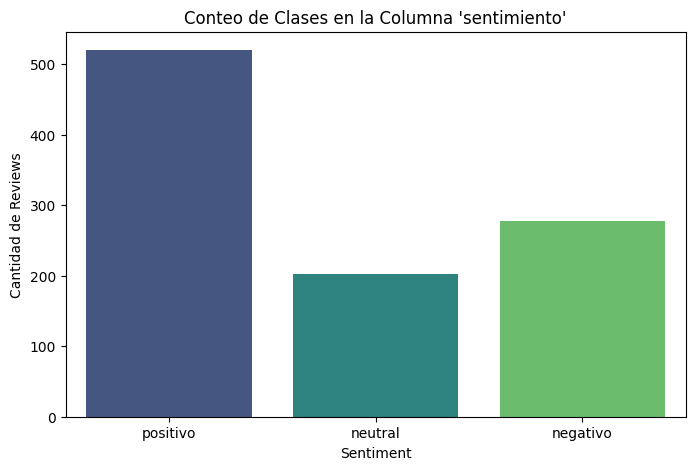

In [13]:
plt.figure(figsize=(8,5))

# Countplot
sns.countplot(
    data=df,
    x='sentimiento',
    hue='sentimiento',
    palette='viridis',
    dodge=False,
    legend=False
)

plt.title("Conteo de Clases en la Columna 'sentimiento'")
plt.xlabel("Sentiment")
plt.ylabel("Cantidad de Reviews")
plt.show()

# Sensurar Producto
---

In [14]:
import sys
sys.path.append('../')
from src.utils import clean_text, load_product_reviews, prepare_data

In [15]:
# Mapeo de sentimientos a valores numéricos
SENTIMENT_MAPPING = {
    'positivo': 2,
    'neutro': 1,
    'negativo': 0
}

SENTIMENT_NORMALIZATION = {
    'positivo': 'positivo',
    'positive': 'positivo',
    'neutro': 'neutro',
    'neutral': 'neutro',
    'negativo': 'negativo',
    'negative': 'negativo'
}

df = load_product_reviews(data_path='../data/reseñas_productos_sintetico.json')
train_df, test_df = prepare_data(df, test_size=0.2)

✓ Dataset cargado con éxito desde: ../data/reseñas_productos_sintetico.json
  - Total de reseñas: 1000
  - Productos únicos: 10
  - Distribución de sentimientos:
    • positivo: 520 (52.0%)
    • negativo: 277 (27.7%)
    • neutro: 203 (20.3%)

Limpiando texto...
                                         reseña_limpia
254  aceptable cumple prometido sobresaliente ser r...
6                   decepcionado dejó funcionar semana
19   funciona maravilla rápido confiable incluía ac...
558  superó expectativas excelente calidad buen ren...
364       recomiendo calidad deja desear llegó rasguño
164   decepcionado dejó funcionar semana entrega lenta
1             aceptable cumple prometido sobresaliente
331  problemas constantes mala experiencia compra e...
65   funciona maravilla rápido confiable llegó rasguño
7         problemas constantes mala experiencia compra

✓ Datos preparados:
  - Datos de entrenamiento: 33 muestras
  - Datos de prueba: 9 muestras

  Balance de clases en entrenamiento:

In [16]:
train_df

,producto,sentimiento,reseña,reseña_limpia,sentimiento_numerico
912,Teclado,positivo,"Funciona de maravilla, el Teclado es rápido y ...",funciona maravilla rápido confiable entrega lenta,2
149,Altavoces,neutro,"El Altavoces es aceptable, cumple con lo prome...",aceptable cumple prometido sobresaliente inclu...,1
0,Auriculares,positivo,"Funciona de maravilla, el Auriculares es rápid...",funciona maravilla rápido confiable,2
49,Laptop,neutro,"El Laptop es aceptable, cumple con lo prometid...",aceptable cumple prometido sobresaliente llegó...,1
45,Cámara,negativo,"Problemas constantes con el Cámara, mala exper...",problemas constantes mala experiencia compra s...,0
109,Impresora,neutro,"Cumple su función básica, el Impresora no dest...",cumple función básica destaca entrega lenta,1
331,Impresora,negativo,"Problemas constantes con el Impresora, mala ex...",problemas constantes mala experiencia compra e...,0
168,Teclado,negativo,"No recomiendo este Teclado, la calidad deja mu...",recomiendo calidad deja desear ser reemplazado...,0
254,Smartwatch,neutro,"El Smartwatch es aceptable, cumple con lo prom...",aceptable cumple prometido sobresaliente ser r...,1
5,Tablet,positivo,"Encantado con mi nuevo Tablet, vale cada peso ...",encantado nuevo vale cada peso invertido,2


In [17]:
test_df

,producto,sentimiento,reseña,reseña_limpia,sentimiento_numerico
164,Altavoces,negativo,"Muy decepcionado con el Altavoces, dejó de fun...",decepcionado dejó funcionar semana entrega lenta,0
794,Smartwatch,negativo,"Muy decepcionado con el Smartwatch, dejó de fu...",decepcionado dejó funcionar semana llegó rasguño,0
121,Monitor,positivo,"Encantado con mi nuevo Monitor, vale cada peso...",encantado nuevo vale cada peso invertido ser r...,2
938,Smartphone,neutro,"Cumple su función básica, el Smartphone no des...",cumple función básica destaca ser reemplazado ...,1
197,Auriculares,neutro,"Cumple su función básica, el Auriculares no de...",cumple función básica destaca incluía accesori...,1
479,Auriculares,positivo,"Encantado con mi nuevo Auriculares, vale cada ...",encantado nuevo vale cada peso invertido entre...,2
10,Tablet,neutro,"Un Tablet promedio, ni muy bueno ni muy malo.",promedio bueno malo,1
639,Laptop,positivo,"Encantado con mi nuevo Laptop, vale cada peso ...",encantado nuevo vale cada peso invertido llegó...,2
16,Monitor,negativo,"No recomiendo este Monitor, la calidad deja mu...",recomiendo calidad deja desear,0


# END
---